# Exercise 1

# Submission

Submitted by Roy Asher, ID 200844009

Kaggle profile: https://www.kaggle.com/royabr121

This is a machine learning challenge presented by Kaggle as an entry level task. Given that some groups of passengers were more likely to survive the sinking of the RMS Titanic on the 15th of April, 1912, I will attempt - using Logistic Regression and the data provided - to examine which kind of passenger was more likely to survive than not. Logistic Regression is used since I am currently not studying Neural Networks and have no experience with it.

Please note: for the **Exercise 3** section go down until the title is seen. Exercise 1 has been slightly modified but not in any truely significant way.

# Imports and Preparatory Configurations

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport
from tqdm.auto import tqdm

import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LinearRegression

# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

# Functions 

In [2]:
def SGDClassifier_probabilities_func(data_df, y_column, X_columns, test_size, learning_rate, eta0 = 0.01, print_results = True, max_iter = 1000, alpha = 0): 

    t = data_df[y_column]
    X = data_df[X_columns]

    X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size = test_size, random_state = 2)
    
    # create the SGD classifier and predict the probabilities of the train and test data
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss = 'log', alpha = alpha, learning_rate = learning_rate, eta0 = eta0, max_iter = max_iter)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_test)
    
    # print the accuracy score and CE loss of the train and test
    if (print_results):
        print('Accuracy score on train:', SGD_cls.score(X_train, t_train))
        print('Accuracy score on test:', SGD_cls.score(X_test, t_test))
        print()
        print('CE on train:', metrics.log_loss(t_train, y_train_prob))
        print('CE on test:', metrics.log_loss(t_test, y_test_prob))
    
    return SGD_cls
    

# Data Investigation and Preprocessing

In [3]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We need to examine the data missing from our data sets:

In [4]:
train_missing = train_df.isnull().sum().sort_values(ascending=False)
percent = round(train_missing / len(train_df) * 100, 2)
print("Train Missing Data:")
print(pd.concat([train_missing, percent],axis = 1,keys = ['Missing Value Totals','Percentage']),"\n")

test_missing = test_df.isnull().sum().sort_values(ascending=False)
percent = round(test_missing / len(test_df) * 100, 2)
print("Test Missing Data:")
print(pd.concat([test_missing, percent],axis = 1,keys = ['Missing Value Totals','Percentage']),"\n")

Train Missing Data:
             Missing Value Totals  Percentage
Cabin                         687       77.10
Age                           177       19.87
Embarked                        2        0.22
Fare                            0        0.00
Ticket                          0        0.00
Parch                           0        0.00
SibSp                           0        0.00
Sex                             0        0.00
Name                            0        0.00
Pclass                          0        0.00
Survived                        0        0.00
PassengerId                     0        0.00 

Test Missing Data:
             Missing Value Totals  Percentage
Cabin                         327       78.23
Age                            86       20.57
Fare                            1        0.24
Embarked                        0        0.00
Ticket                          0        0.00
Parch                           0        0.00
SibSp                           0      

In [5]:
# pandas report:

'''profile = ProfileReport(train_df, title="Titanic - Machine Learning from Disaster")
profile.to_file("Titanic.html")'''

'profile = ProfileReport(train_df, title="Titanic - Machine Learning from Disaster")\nprofile.to_file("Titanic.html")'

In [6]:
train_df_unique = train_df.nunique().sort_values(ascending=False)
pd.concat([train_df_unique],axis = 1,keys = ['Unique Value Totals'])

,Unique Value Totals
Name,891
PassengerId,891
Ticket,681
Fare,248
Cabin,147
Age,88
Parch,7
SibSp,7
Embarked,3
Pclass,3


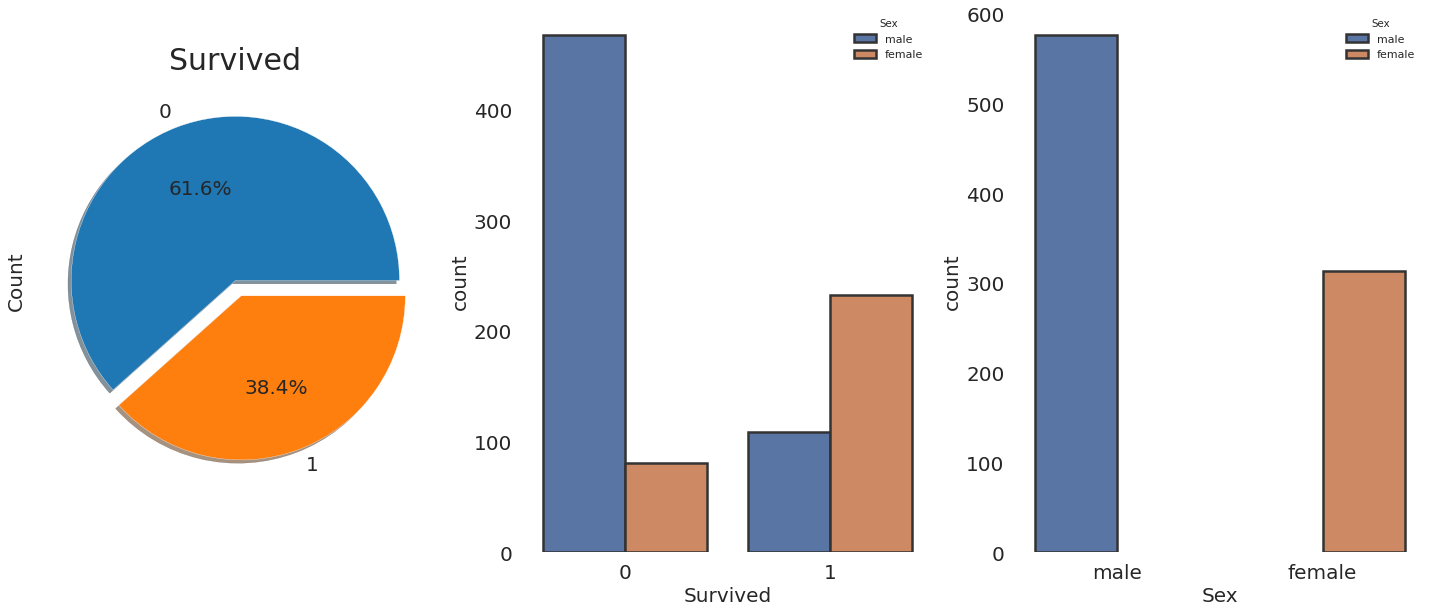

In [7]:
fig,ax = plt.subplots(1,3,figsize=(25,10))
train_df['Survived'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Survived',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font = "Verdana")
sns.set_style("ticks")
sns.countplot('Survived',hue = 'Sex',linewidth = 2.5,edgecolor = ".2",data = train_df,ax = ax[1])
sns.countplot('Sex',hue = 'Sex',linewidth = 2.5,edgecolor = ".2",data = train_df,ax = ax[2])
plt.ioff()

Without taking any factors in consideration, a person had 38.4 percent of surviving the RMS Titanic disaster. Women account for slightly more than a third of the passengers but are two-thirds of all survivors. It appears the "Women and Children First" was adhered to. Sex appears to have had significant correlation to survival. 

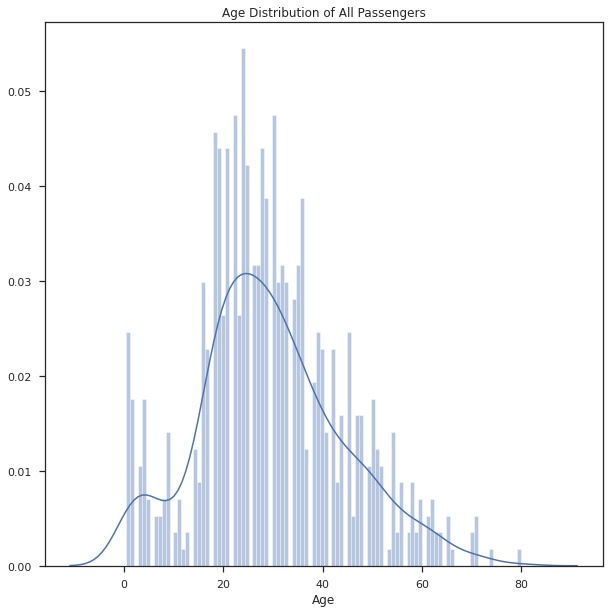

In [8]:
plt.subplots(figsize = (10,10))
graph = sns.distplot(train_df['Age'], bins = 100, kde = True, rug = False, norm_hist=False);
graph.set_title("Age Distribution of All Passengers")
plt.ioff()

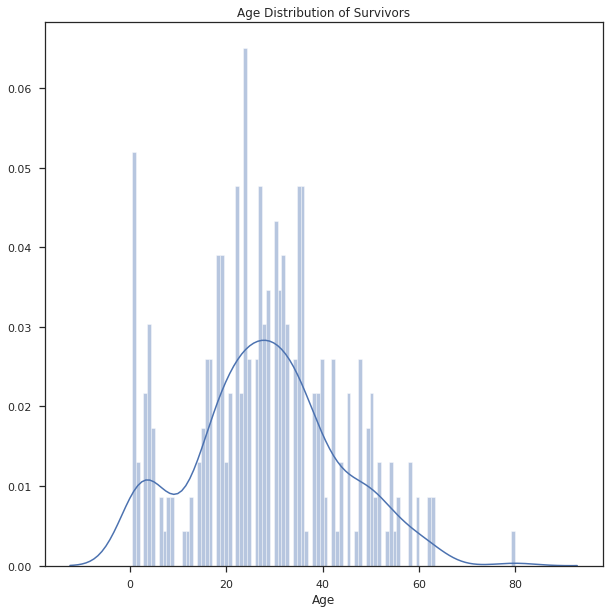

In [9]:
train_df_survivors = train_df[train_df['Survived'] == True]
plt.subplots(figsize = (10,10))
graph = sns.distplot(train_df_survivors['Age'], bins = 100, kde = True, rug = False, norm_hist=False);
graph.set_title("Age Distribution of Survivors")
plt.ioff()

We should consider that some 20 percent of Age data cannot be found, but it appears that a person's age did not play a very significant role in their survival. The two distributions show us a roughly equal distribution of ages among the all of the passengers and the survivors. There are slight variations though, mainly around the edges: the "Women and Children First" also included the elderly so it stands to reason it helped some of them survive. 

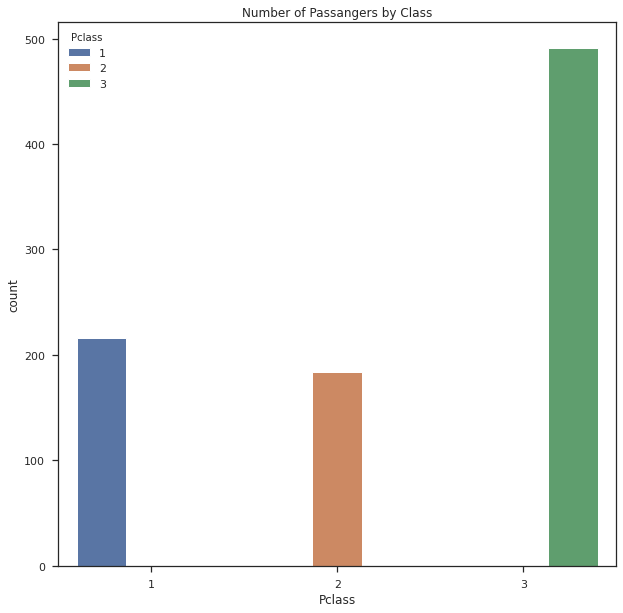

In [10]:
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Pclass", hue="Pclass", data=train_df)
graph.set_title("Number of Passangers by Class")
plt.ioff()

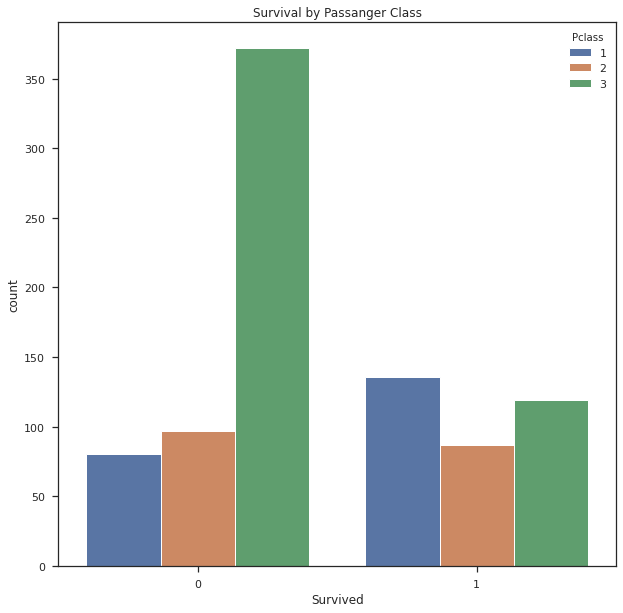

In [11]:
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Survived", hue="Pclass", data=train_df)
graph.set_title("Survival by Passanger Class")
plt.ioff()

As we can see, 3rd class passengers formed the majority aboard the Titanic but their death toll is still out of propertion. It can be argued that 2nd class passengers had the least amount of survivors since there so many 3rd passengers. Even so, 1st class passengers survived completely out of proportion. In summation, it appears that there is a straight corroletion between the being on the higher classes to surviving. Since since 1st class passengers occupied the upper decks and 3rd class the lower ones this is not surprising - better access to the life boats meant better chances of survival. 

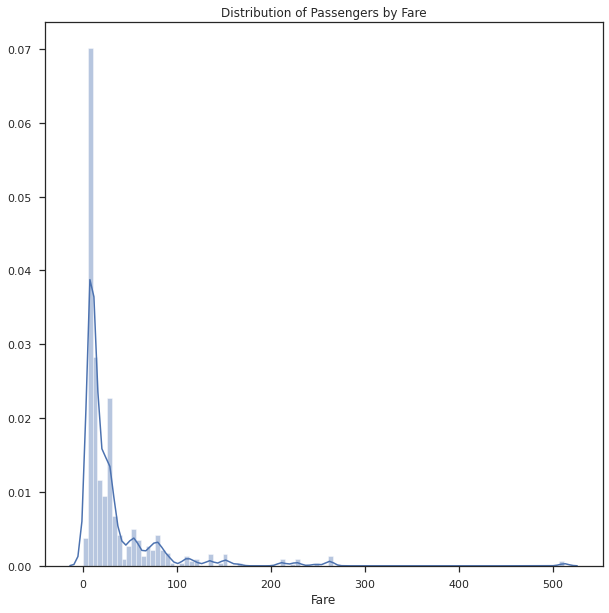

In [12]:
plt.subplots(figsize = (10,10))
graph = sns.distplot(train_df['Fare'], bins = 100, kde = True, rug = False, norm_hist=False);
graph.set_title("Distribution of Passengers by Fare")
plt.ioff()

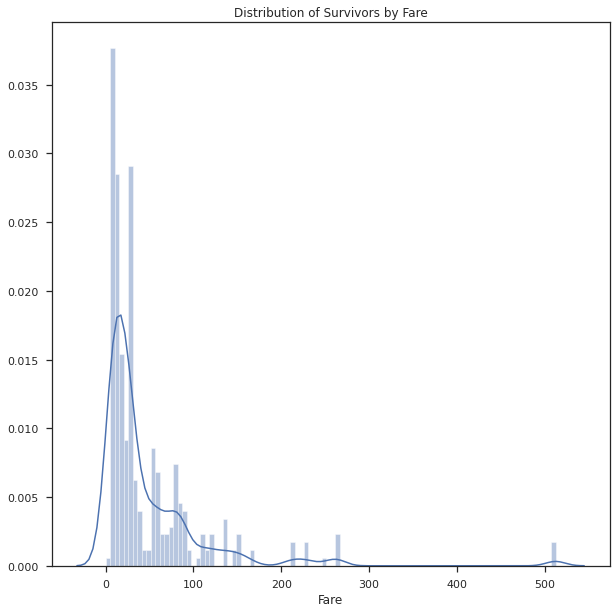

In [13]:
train_df_survivors = train_df[train_df['Survived'] == True]
plt.subplots(figsize = (10,10))
graph = sns.distplot(train_df_survivors['Fare'], bins = 100, kde = True, rug = False, norm_hist=False);
graph.set_title("Distribution of Survivors by Fare")
plt.ioff()

As we can see, the vast majority of passengers paid low fares. The distributions are similar but it is clear if a passenger had paid larger Fair they were more likely to survive (x => 60 and the edges). Fare appears than to had had some influence.

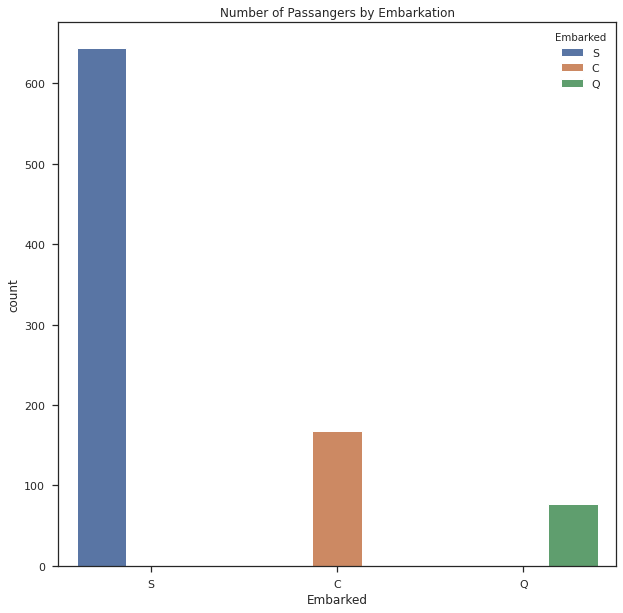

In [14]:
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Embarked", hue="Embarked", data=train_df)
graph.set_title("Number of Passangers by Embarkation")
plt.ioff()

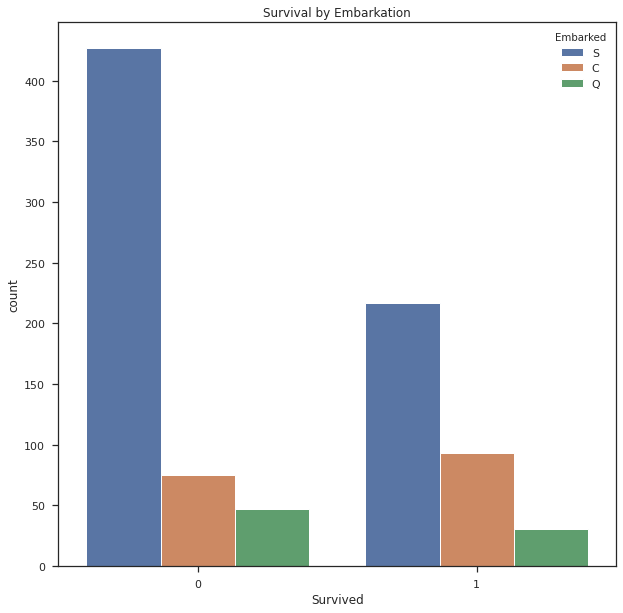

In [15]:
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Survived", hue="Embarked", data=train_df)
graph.set_title("Survival by Embarkation")
plt.ioff()

It appears Embarkation had relatively minor influence on the fate of the passengers. I summaize this since the vast majority of passangers embarkated in Southampton and so them being the biggest group of the survivers can be attributed to simply being more of them. Considering their majortiy is by a wide margin it can also by hypothosized that they form the majority of the 3rd class passengers. There were slightliy more survivers than dead from Cherbourg and the reverse for those from Queenstown, so it is possible that for the most part the 1st and 2nd class passengers came Cherbourg and Queenstown respectively (see "Number of Passangers by Class" and "Survival by Passanger Class" above), but nothing definitive. 

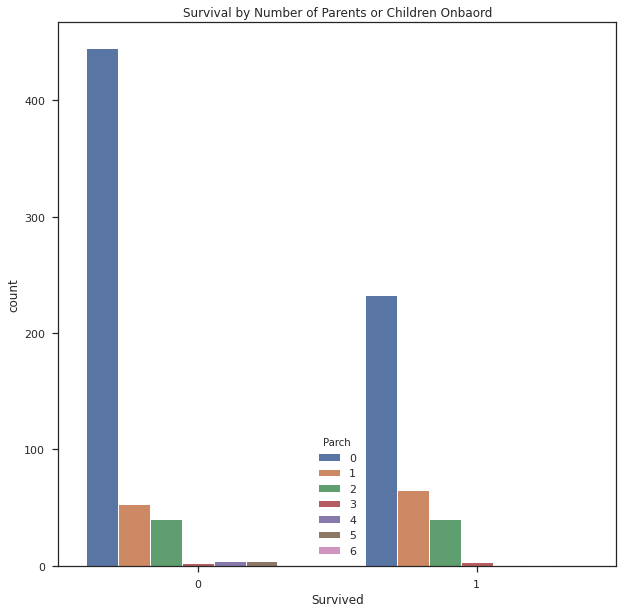

In [16]:
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Survived", hue="Parch", data=train_df)
graph.set_title("Survival by Number of Parents or Children Onbaord")
plt.ioff()

It can 

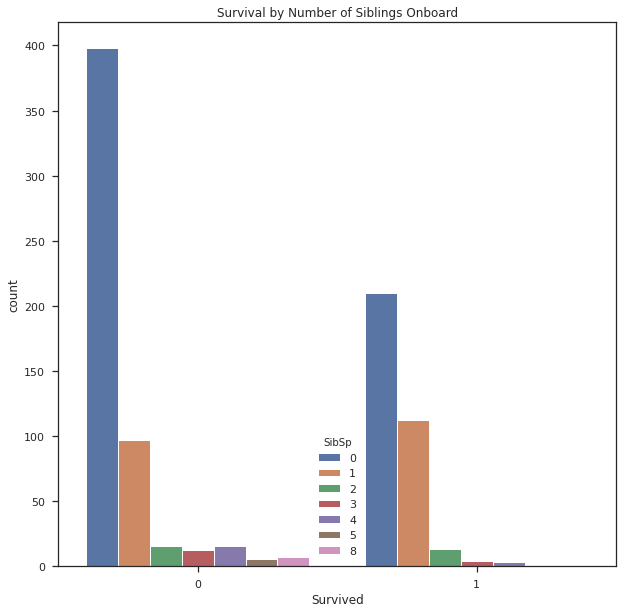

In [17]:
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Survived", hue="SibSp", data=train_df)
graph.set_title("Survival by Number of Siblings Onboard")
plt.ioff()

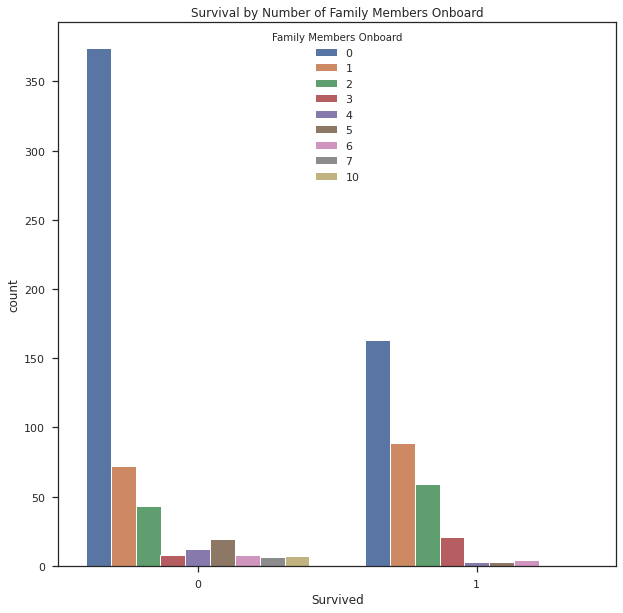

In [18]:
family_df = train_df.copy()
family_df['Family Members Onboard'] = family_df['Parch'] + family_df['SibSp']
plt.subplots(figsize = (10,10))
graph = sns.countplot(x="Survived", hue="Family Members Onboard", data=family_df)
graph.set_title("Survival by Number of Family Members Onboard")
plt.ioff()

We can conclude that having between 2 and 3 family members was beneficial onboard the Titanc - they could aid each other during the disaster and ensure each other's survival. For that reason traveling alone appears to be detrimental. On the other side, having too many family members could have slowed down a family and made survival hard - passengers with 4 family members or more appear to survive less according to this graph.  

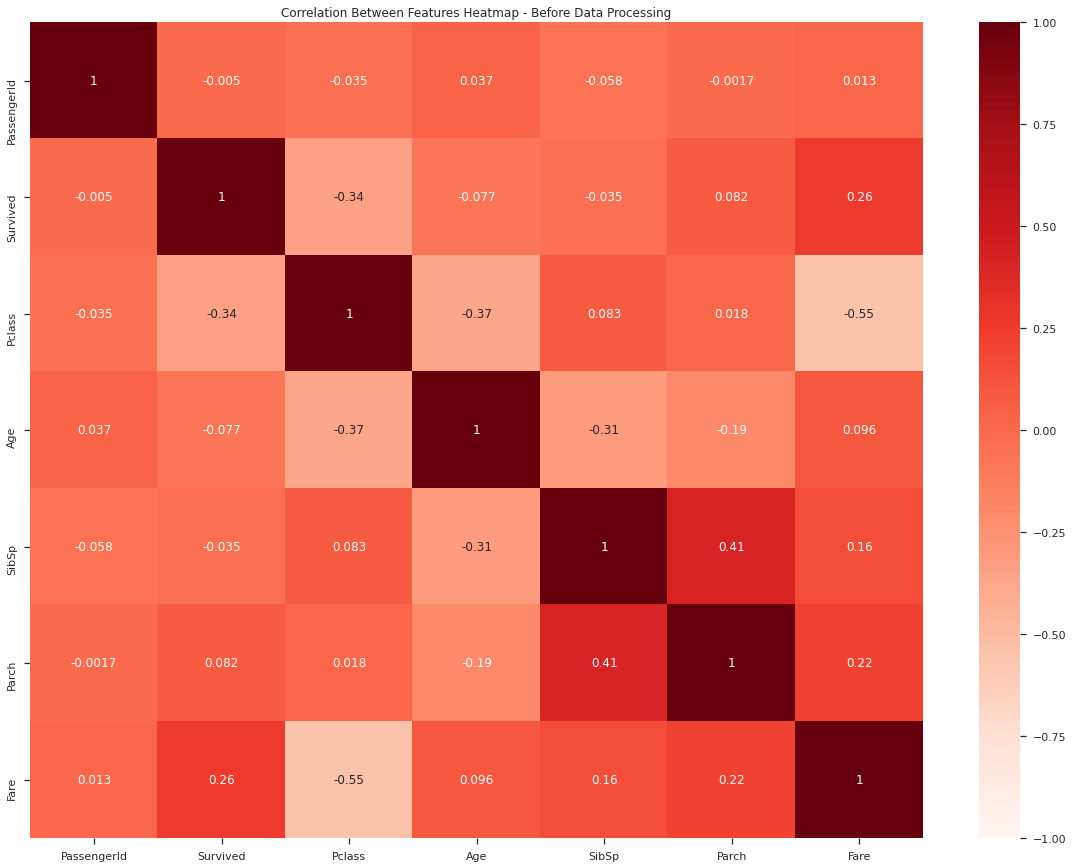

In [19]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(20,15))
cor = train_df.corr()
graph = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=-1, vmax=1)
graph.set_title("Correlation Between Features Heatmap - Before Data Processing")
plt.show()

# Modification and Addition of Features

Let's add two hyperfeatures: 'Size of Family Onboard'(scalar) and 'Is Alone'(binary).

In [20]:
# add Size of Family Onboard column 
train_df['Size of Family Onboard'] = train_df['Parch'] + train_df['SibSp']

# add Is Alone column
train_df.loc[train_df['Size of Family Onboard'] == 0, 'Is Alone'] = 1
train_df.loc[train_df['Size of Family Onboard'] != 0, 'Is Alone'] = 0

We need to process some of the data we have:

* PassengerId, Name and Ticket have been dropped since they are unlikely to correlate to a passenger's survival. 
* Cabin has 77% of missing values - it is best to drop it do not know how to compensate.

In [21]:
# drop PassengerId, Name, Ticket and Cabin
train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

* Nearly 20% of the Age column is missing - since age may influence survival we will not drop those rows, but use the median age per Pclass.

In [22]:
# calculating median age for each Pclass in training data
Pclass_1_Median_Age = train_df.loc[train_df['Pclass'] == 1, 'Age'].dropna().median()
Pclass_2_Median_Age = train_df.loc[train_df['Pclass'] == 2, 'Age'].dropna().median()
Pclass_3_Median_Age = train_df.loc[train_df['Pclass'] == 3, 'Age'].dropna().median()


# imputing missing values in training data
train_df.loc[train_df['Pclass'] == 1, 'Age'] = train_df.loc[train_df['Pclass'] == 1, 'Age'].fillna(Pclass_1_Median_Age)
train_df.loc[train_df['Pclass'] == 2, 'Age'] = train_df.loc[train_df['Pclass'] == 2, 'Age'].fillna(Pclass_2_Median_Age)
train_df.loc[train_df['Pclass'] == 3, 'Age'] = train_df.loc[train_df['Pclass'] == 3, 'Age'].fillna(Pclass_3_Median_Age)

* Modify the Sex column to be binary - 0 for male and 1 for female.

In [23]:
sex_mapping = {"male" : 0, "female" : 1}
train_df['Sex'] = [sex_mapping[item] for item in train_df['Sex']]

* Only 2 rows have null for Embarked - we will impute them with 'S' since it is unlikely to influence results.
* We need to convert the Embarked column to three binary ones to denote points of embarkation for each passenger.

In [24]:
# for training data
train_df['Embarked'] = train_df['Embarked'].fillna('S')
embarked_df = pd.get_dummies(train_df['Embarked'], dummy_na = False)
train_df = pd.concat([train_df, embarked_df], 1)
train_df.drop('Embarked', axis=1, inplace=True)

Let's confirm we have what we need:

In [25]:
train_missing = train_df.isnull().sum().sort_values(ascending=False)
percent = round(train_missing / len(train_df) * 100, 2)
pd.concat([train_missing,percent],axis = 1,keys = ['Missing Value Totals','Percentage'])

,Missing Value Totals,Percentage
S,0,0.0
Q,0,0.0
C,0,0.0
Is Alone,0,0.0
Size of Family Onboard,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0


Text(0.5, 1.0, 'Correlation Between Features Heatmap - After Data Processing and Hyperfeatures')

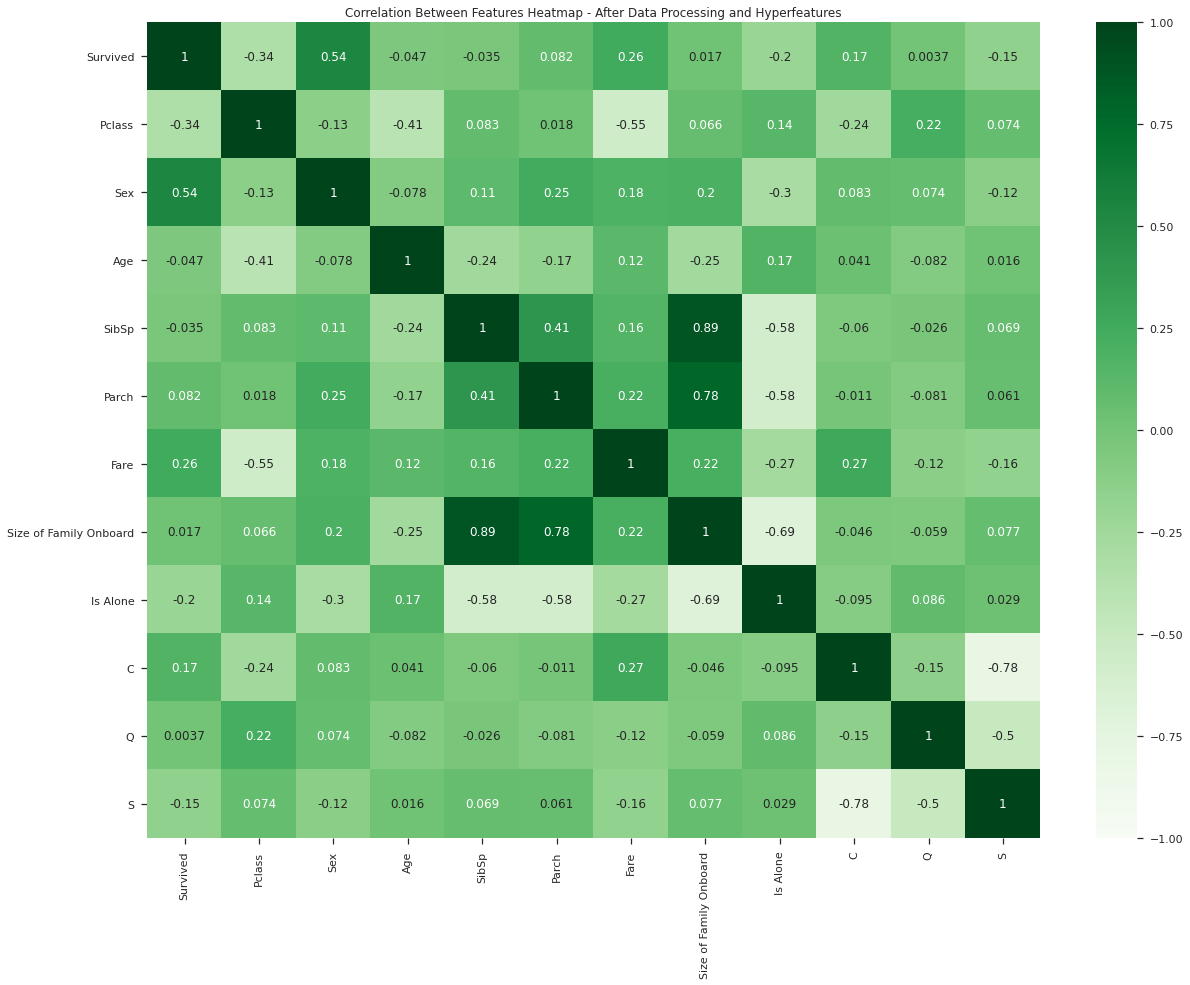

In [26]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(20,15))
cor = train_df.corr()
graph = sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, vmin=-1, vmax=1)
graph.set_title("Correlation Between Features Heatmap - After Data Processing and Hyperfeatures")

# Experimentation and Testing



Logistic Regression:

Let's try and find the optimal training/testing ratio for our validation phase. We will use only the original features we have from the data set in their modified form.

In [27]:
X_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S'] 
y_column = 'Survived'

In [28]:
# data splitting 90/10 for training/validation
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.1, 'constant')
plt.ioff()

Accuracy score on train: 0.8177278401997503
Accuracy score on test: 0.7444444444444445

CE on train: 0.43062978986064004
CE on test: 0.5288400381053233


In [29]:
# data splitting 80/20 for training/validation
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.2, 'constant')
plt.ioff()

Accuracy score on train: 0.8188202247191011
Accuracy score on test: 0.7932960893854749

CE on train: 0.42492214950697993
CE on test: 0.5047005034472178


In [30]:
# data splitting 70/30 for training/validation
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.8089887640449438
Accuracy score on test: 0.8022388059701493

CE on train: 0.4245950650961848
CE on test: 0.4797054028628332


The 90/10 ratio consistantly has a test accuracy score of ~0.74444, which is inferior to the up to 0.8 of the other scores. The 80/20 and 70/30 ratios are pretty similar when run multiple times with the exception CE on test figure which is 0.474-0.485 for the 70/30 and 0.50-0.51 for the 80/20. Therefore we will proceed with 70/30 ratio out of the three.

Accuracy score on train: 0.8170144462279294 

Accuracy score on test: 0.7985074626865671 

CE on train: 0.42484196785821177 

CE on test: 0.4780093238265224

Now let's experiment with different feature combinations:

In [31]:
# all of the original features that survived filtering
X_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S'] 
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.8170144462279294
Accuracy score on test: 0.8059701492537313

CE on train: 0.42521909959999604
CE on test: 0.4809279678790576


In [32]:
# every feature with of |correlation| > 0.1
X_columns = ['Pclass','Sex','Fare','C','S','Is Alone'] 
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.7945425361155698
Accuracy score on test: 0.7649253731343284

CE on train: 0.4500787604583982
CE on test: 0.4896127232001579


In [33]:
# all of the original features that survived filtering + Size of Family Onboard
X_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S','Size of Family Onboard'] 
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.8105939004815409
Accuracy score on test: 0.7873134328358209

CE on train: 0.4261272529889555
CE on test: 0.47929203232471895


In [34]:
# all of the original features that survived filtering + Is Alone
X_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S','Is Alone'] 
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.812199036918138
Accuracy score on test: 0.7985074626865671

CE on train: 0.41940342913362244
CE on test: 0.4784308278887057


In [35]:
# all of the original features that survived filtering + Size of Family Onboard + Is Alone
X_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S','Size of Family Onboard' ,'Is Alone'] 
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.8154093097913323
Accuracy score on test: 0.7985074626865671

CE on train: 0.4189353896050189
CE on test: 0.48026146209712983


The 'original features + Size of Family Onboard + Is Alone' provided the best results in terms of the maximum Accuracy scores that were achieved. 

Accuracy score on train: 0.8170144462279294

Accuracy score on test: 0.8022388059701493

CE on train: 0.41984905790017285

CE on test: 0.47914335742390641

In [36]:
X_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S','Size of Family Onboard','Is Alone'] 

Now let's try and optimize the SGD Scaler:

In [37]:
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'constant')
plt.ioff()

Accuracy score on train: 0.812199036918138
Accuracy score on test: 0.7985074626865671

CE on train: 0.4190106839108524
CE on test: 0.4791410590127496


In [38]:
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'adaptive')
plt.ioff()

Accuracy score on train: 0.8138041733547352
Accuracy score on test: 0.7985074626865671

CE on train: 0.4187657721472224
CE on test: 0.4804242227347735


In [39]:
SGDClassifier_probabilities_func(train_df, y_column, X_columns, 0.3, 'optimal', alpha = 0.01)
plt.ioff()

Accuracy score on train: 0.812199036918138
Accuracy score on test: 0.7947761194029851

CE on train: 0.4208962856990165
CE on test: 0.47363257284162447


For the SGD Classifier the 'optimal' learning with an alpha of 0.01 appears to be best.

# Test Data and Submission

View any missing values in the test data:

In [40]:
train_missing = test_df.isnull().sum().sort_values(ascending=False)
percent = round(train_missing / len(train_df) * 100, 2)
pd.concat([train_missing,percent],axis = 1,keys = ['Missing Value Totals','Percentage'])

,Missing Value Totals,Percentage
Cabin,327,36.70
Age,86,9.65
Fare,1,0.11
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Let's process the test data in the same way we did the training data:

In [41]:
# add Size of Family Onboard column 
test_df['Size of Family Onboard'] = train_df['Parch'] + train_df['SibSp']

# add Is Alone column
test_df.loc[test_df['Size of Family Onboard'] == 0, 'Is Alone'] = 1
test_df.loc[test_df['Size of Family Onboard'] != 0, 'Is Alone'] = 0

# calculating median age for each Pclass in test data
Pclass_1_Median_Age = test_df.loc[test_df['Pclass'] == 1, 'Age'].dropna().median()
Pclass_2_Median_Age = test_df.loc[test_df['Pclass'] == 2, 'Age'].dropna().median()
Pclass_3_Median_Age = test_df.loc[test_df['Pclass'] == 3, 'Age'].dropna().median()

# imputing missing values in test data
test_df.loc[test_df['Pclass'] == 1, 'Age'] = test_df.loc[test_df['Pclass'] == 1, 'Age'].fillna(Pclass_1_Median_Age)
test_df.loc[test_df['Pclass'] == 2, 'Age'] = test_df.loc[test_df['Pclass'] == 2, 'Age'].fillna(Pclass_2_Median_Age)
test_df.loc[test_df['Pclass'] == 3, 'Age'] = test_df.loc[test_df['Pclass'] == 3, 'Age'].fillna(Pclass_3_Median_Age)

# modify the Sex column to be binary - 0 for male and 1 for female.
sex_mapping = {"male" : 0, "female" : 1}
test_df['Sex'] = [sex_mapping[item] for item in test_df['Sex']]

# modify the Embarked column
test_df['Embarked'] = test_df['Embarked'].fillna('S')
embarked_df = pd.get_dummies(test_df['Embarked'], dummy_na = False)
test_df = pd.concat([test_df, embarked_df], 1)
test_df.drop('Embarked', axis=1, inplace=True)

# the final PassengerId column is preserved for the submission later
PassengerId = test_df['PassengerId']

# drop PassengerId, Name, Ticket, Cabin and Pclass
test_df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True) 

# compensate for the two missing values in Fare
Fare_Median = test_df['Fare'].median()
test_df['Fare'].fillna(value=Fare_Median,inplace=True) #ask aviad what to do about this

Let's make sure we have what we need:

In [42]:
train_missing = test_df.isnull().sum().sort_values(ascending=False)
percent = round(train_missing / len(train_df) * 100, 2)
pd.concat([train_missing,percent],axis = 1,keys = ['Missing Value Totals','Percentage'])

,Missing Value Totals,Percentage
S,0,0.0
Q,0,0.0
C,0,0.0
Is Alone,0,0.0
Size of Family Onboard,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0


* Let's train the model and submit:

In [43]:
t_train = train_df[y_column]
X_train = train_df[X_columns]
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss = 'log', alpha = 0.01, learning_rate = 'optimal', eta0 = 0.01)).fit(X_train, t_train)
X_test = test_df[X_columns]
predictions = SGD_cls.predict(X_test)

#submission 
my_submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
my_submission.to_csv('submission.csv', index = False)

# Conclusions

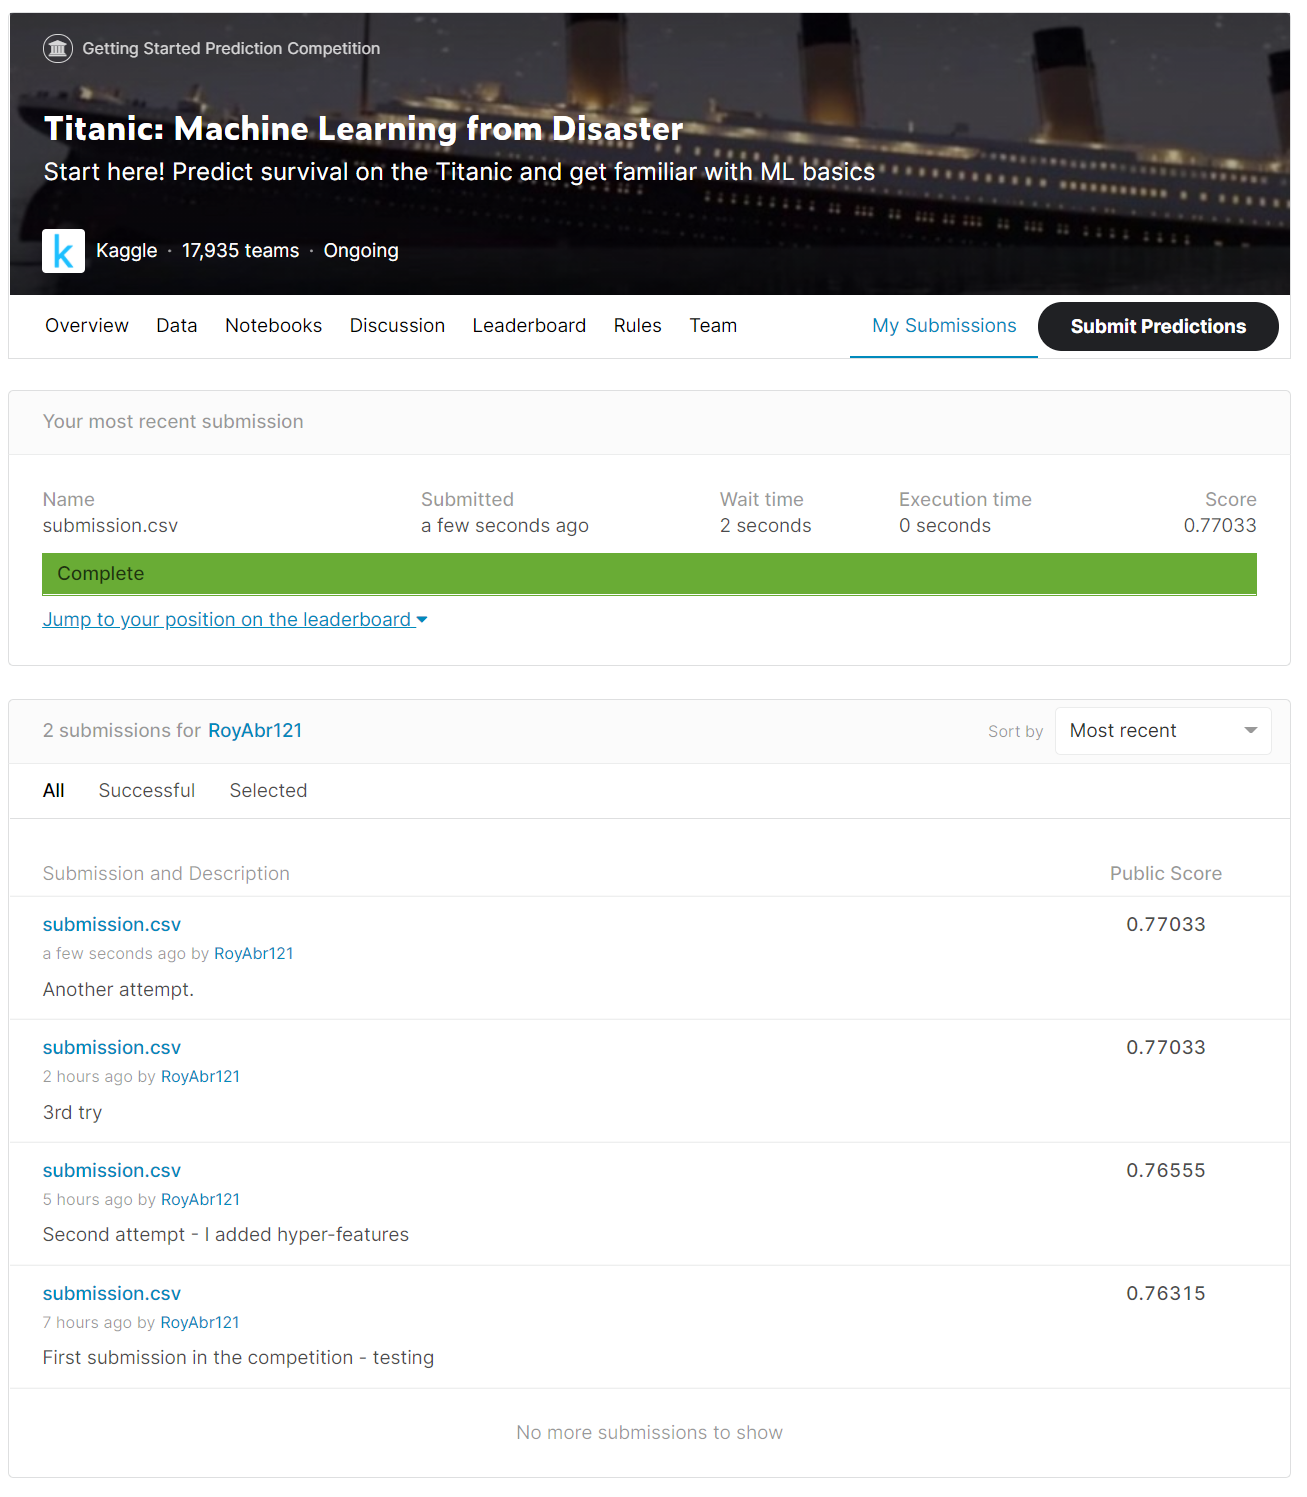

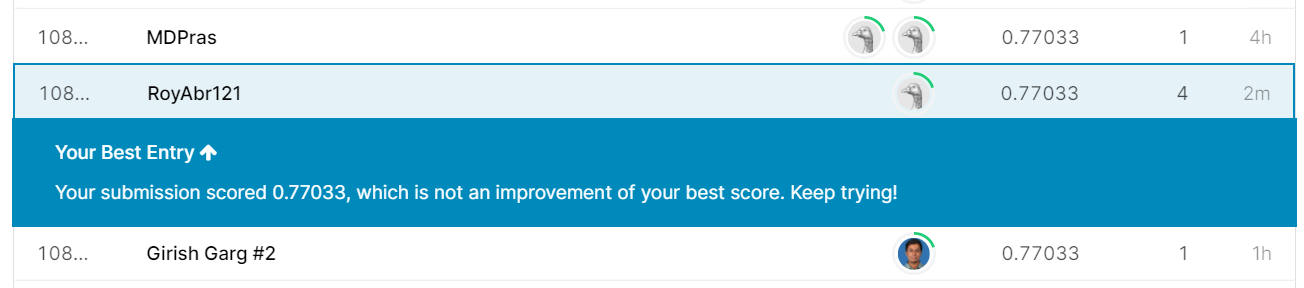

* Sex and Social class played a pivotal role in surviving the disaster.
* Traveling with a family up to a certain size improved the chances for survival.
* Age played almost no part in determinig passengers' fate. 
* Optimal learning rate for the SGD Classifier delivered the best results - everything else worsend the accuracy. 
* We arrived at 77 percent accuracy. It may be possible to improve this using other ML technologies or more features.

# Exercise 3

# Functions

In [44]:
# display confusion matrix and KPI scores
def display_confusion_matrix_and_KPI(model, X, t):
    
    predictions = cross_val_predict(model, X, t, cv=LeaveOneOut())
    cm = confusion_matrix(t, predictions)

    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    f1 = 2 * (precision * recall) / (precision + recall)

    plt.figure(figsize=(15,10))
    cm_df = pd.DataFrame(cm, index=['Actual - Perished', 'Actual - Survived'], columns=['Predicted - Perished', 'Predicted - Survived'])
    fig = sns.heatmap(cm_df, annot=True, fmt='g', cmap=plt.cm.Blues)

    plt.show()
    print('Recall:', recall, '\nSpecificity:', specificity, '\nPrecision:', precision, '\nAccuracy:',accuracy, '\nF1 Score:', f1)

# Data Pre-Processing

In [45]:
# read data sets:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [46]:
# pandas report:
#profile = ProfileReport(train_df, title="Titanic - Machine Learning from Disaster")
#profile.to_file("Titanic.html")

In [47]:
# Let us examine any missing data in both train and test data sets:
missing = train_df.isnull().sum().sort_values(ascending=False)
percent = round(missing / len(train_df) * 100, 2)
print("Train Dataframe:")
print(pd.concat([missing,percent],axis = 1, keys = ['Missing Value Totals','Percentage']),"\n")

missing = test_df.isnull().sum().sort_values(ascending=False)
percent = round(missing / len(test_df) * 100, 2)
print("Test Dataframe:")
print(pd.concat([missing,percent],axis = 1, keys = ['Missing Value Totals','Percentage']))

Train Dataframe:
             Missing Value Totals  Percentage
Cabin                         687       77.10
Age                           177       19.87
Embarked                        2        0.22
Fare                            0        0.00
Ticket                          0        0.00
Parch                           0        0.00
SibSp                           0        0.00
Sex                             0        0.00
Name                            0        0.00
Pclass                          0        0.00
Survived                        0        0.00
PassengerId                     0        0.00 

Test Dataframe:
             Missing Value Totals  Percentage
Cabin                         327       78.23
Age                            86       20.57
Fare                            1        0.24
Embarked                        0        0.00
Ticket                          0        0.00
Parch                           0        0.00
SibSp                           0        0.00

In [48]:
# some data pre-processing on the training set
# drop Name, Ticket and Cabin
train_df.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

# calculating median age for each Pclass:
Pclass_1_Median_Age = train_df.loc[train_df['Pclass'] == 1, 'Age'].dropna().median()
Pclass_2_Median_Age = train_df.loc[train_df['Pclass'] == 2, 'Age'].dropna().median()
Pclass_3_Median_Age = train_df.loc[train_df['Pclass'] == 3, 'Age'].dropna().median()

# imputing missing values in 'age'
train_df.loc[train_df['Pclass'] == 1, 'Age'] = train_df.loc[train_df['Pclass'] == 1, 'Age'].fillna(Pclass_1_Median_Age)
train_df.loc[train_df['Pclass'] == 2, 'Age'] = train_df.loc[train_df['Pclass'] == 2, 'Age'].fillna(Pclass_2_Median_Age)
train_df.loc[train_df['Pclass'] == 3, 'Age'] = train_df.loc[train_df['Pclass'] == 3, 'Age'].fillna(Pclass_3_Median_Age)

# only 2 rows have null for the column 'Embarked' - we will impute them with 'S' since it is the most common: 
train_df['Embarked'] = train_df['Embarked'].fillna('S')

# some data pre-processing on the test set:
# drop Name, Ticket and Cabin
test_df.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

# calculating median age for each Pclass:
Pclass_1_Median_Age = test_df.loc[test_df['Pclass'] == 1, 'Age'].dropna().median()
Pclass_2_Median_Age = test_df.loc[test_df['Pclass'] == 2, 'Age'].dropna().median()
Pclass_3_Median_Age = test_df.loc[test_df['Pclass'] == 3, 'Age'].dropna().median()

# imputing missing values in 'age'
test_df.loc[test_df['Pclass'] == 1, 'Age'] = test_df.loc[test_df['Pclass'] == 1, 'Age'].fillna(Pclass_1_Median_Age)
test_df.loc[test_df['Pclass'] == 2, 'Age'] = test_df.loc[test_df['Pclass'] == 2, 'Age'].fillna(Pclass_2_Median_Age)
test_df.loc[test_df['Pclass'] == 3, 'Age'] = test_df.loc[test_df['Pclass'] == 3, 'Age'].fillna(Pclass_3_Median_Age)

# compensate for the two missing values in the test data for 'Fare':
Fare_Median = test_df['Fare'].median()
test_df['Fare'].fillna(value=Fare_Median,inplace=True) #ask aviad what to do about this

In [49]:
# divide the data to features and target
t_train = train_df['Survived'].copy()
X_train = train_df.drop(['Survived'], axis=1)

# determine numerical and categorical
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X_train.columns)

columnTransformer = ColumnTransformer([("categorical", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols), ("standard", StandardScaler(), numerical_cols)])
X_train_normalized = columnTransformer.fit_transform(X_train)
X_test_normalized = columnTransformer.fit_transform(test_df)

# K-Nearest Neighbors Models

In [50]:
hyper_parameters = {'n_neighbors': list(range(1, 50)), 'weights' : ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'p':[1,2]}

In [51]:
# perform grid search for the best hyperparameters fro the KNN model and perfrom CV:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), hyper_parameters, cv=50).fit(X_train_normalized, t_train)

print('Grid Search CV score for classification:', grid_search_cv.best_score_)
print('Best Parameters:', grid_search_cv.best_params_)

Grid Search CV score for classification: 0.8271241830065358
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


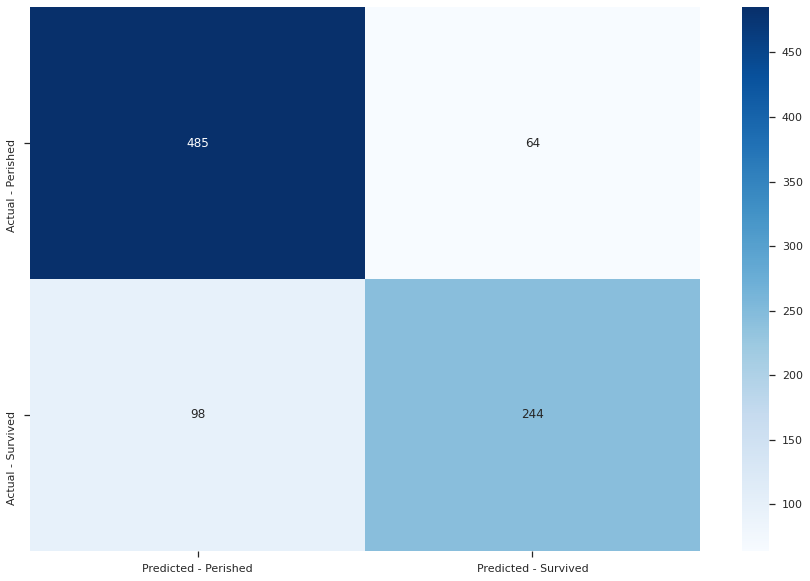

Recall: 0.7134502923976608 
Specificity: 0.8834244080145719 
Precision: 0.7922077922077922 
Accuracy: 0.8181818181818182 
F1 Score: 0.7507692307692309


In [52]:
# train KNN with the grid search hyperparameters and display confusion matrix along with KPIs:
model_KNN_grid_search = KNeighborsClassifier(algorithm='auto', n_neighbors=10, p=1, weights='distance')
display_confusion_matrix_and_KPI(model_KNN_grid_search, X_train_normalized, t_train)

In [53]:
# perform random search for the best hyperparameters fro the KNN model and perfrom CV:
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),hyper_parameters, random_state=1, cv=50).fit(X_train_normalized, t_train)

print('Random Search CV score for classification:', random_search_cv.best_score_)
print('Best Parameters:', random_search_cv.best_params_)

Random Search CV score for classification: 0.8216339869281043
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 18, 'algorithm': 'ball_tree'}


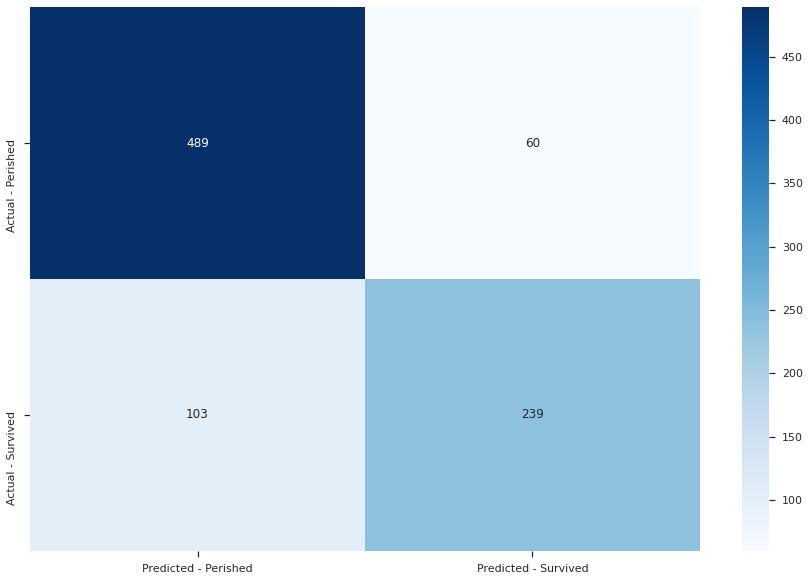

Recall: 0.6988304093567251 
Specificity: 0.8907103825136612 
Precision: 0.7993311036789298 
Accuracy: 0.8170594837261503 
F1 Score: 0.7457098283931357


In [54]:
# train KNN with the random search hyperparameters and display confusion matrix along with KPIs:
model_KNN_random_search = KNeighborsClassifier(weights='distance', p=1, n_neighbors=18, algorithm='ball_tree')
display_confusion_matrix_and_KPI(model_KNN_random_search, X_train_normalized, t_train)

As expected, both the CV and F1 scores for the KNN model with hyperparamters calculated using grid search are better than those for the KNN model with hyperparamters calculated using random search. grid search delivers the better results of the two since it goes over every possibilty, but is prohibitively expensive in terms of time and compute resources.

# Ensemble Models

Cross-Validation score:  0.8237934904601572


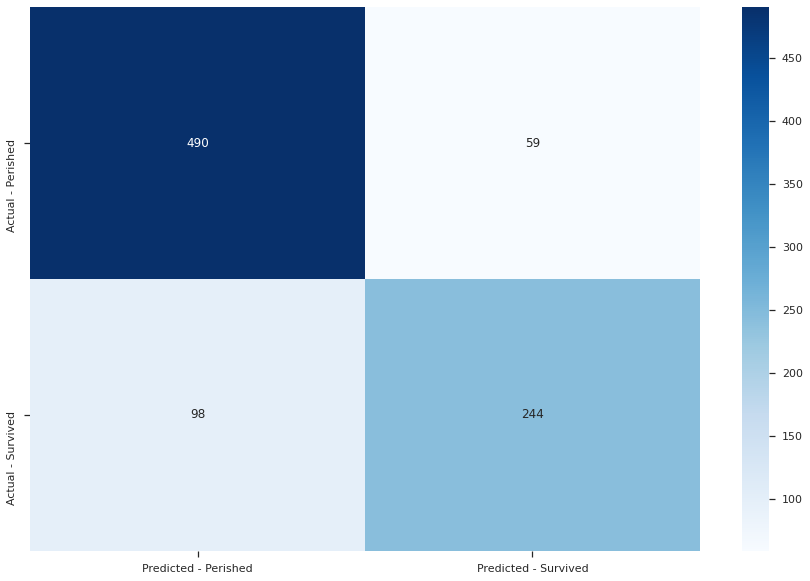

Recall: 0.7134502923976608 
Specificity: 0.8925318761384335 
Precision: 0.8052805280528053 
Accuracy: 0.8237934904601572 
F1 Score: 0.7565891472868217


In [55]:
ensemble_bagging_classifier_KNN_grid_search = BaggingClassifier(base_estimator=model_KNN_grid_search, n_estimators=100, random_state=1).fit(X_train_normalized, t_train)
score = cross_val_score(ensemble_bagging_classifier_KNN_grid_search, X_train_normalized, t_train, cv=LeaveOneOut(), n_jobs=1)
print("Cross-Validation score: ",score.mean())

display_confusion_matrix_and_KPI(ensemble_bagging_classifier_KNN_grid_search, X_train_normalized, t_train)

Cross-Validation score:  0.8204264870931538


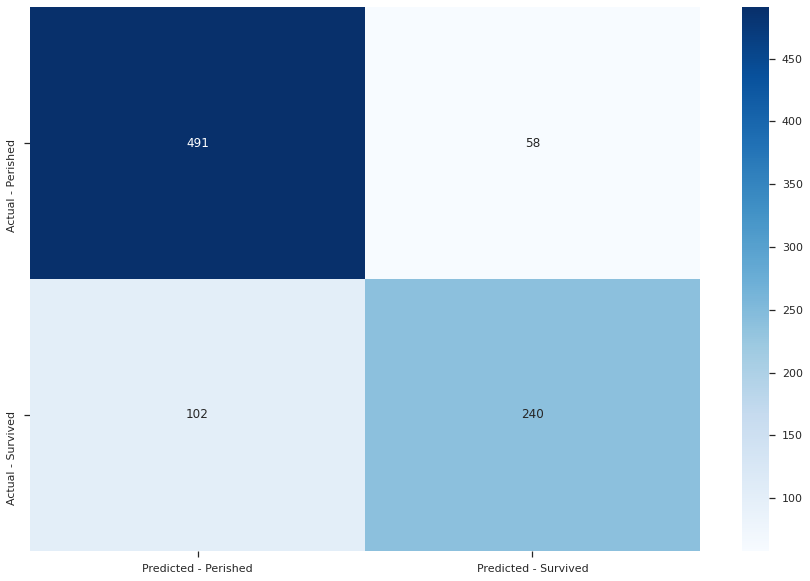

Recall: 0.7017543859649122 
Specificity: 0.8943533697632058 
Precision: 0.8053691275167785 
Accuracy: 0.8204264870931538 
F1 Score: 0.75


In [56]:
ensemble_bagging_classifier_KNN_random_search = BaggingClassifier(base_estimator=model_KNN_random_search, n_estimators=100, random_state=1).fit(X_train_normalized, t_train)
score = cross_val_score(ensemble_bagging_classifier_KNN_random_search, X_train_normalized, t_train, cv=LeaveOneOut(), n_jobs=1)
print("Cross-Validation score: ",score.mean())

display_confusion_matrix_and_KPI(ensemble_bagging_classifier_KNN_random_search, X_train_normalized, t_train)

Cross-Validation Score:  0.7957351290684624


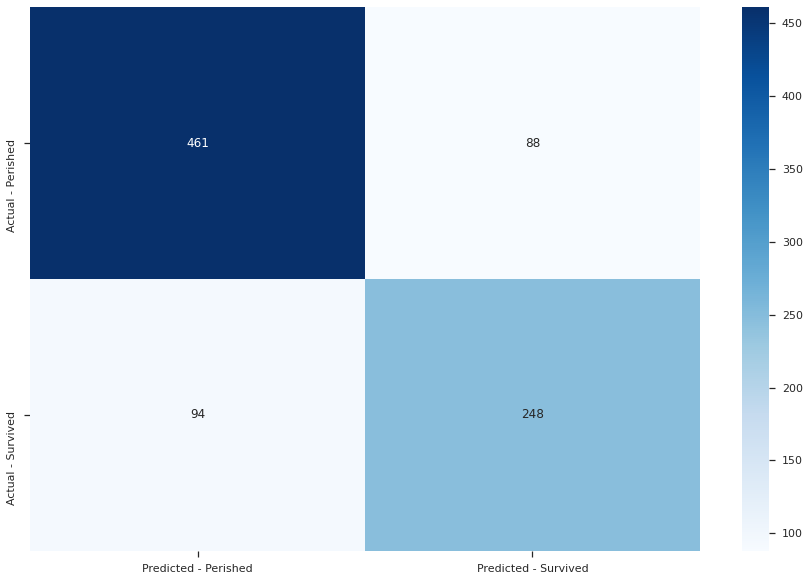

Recall: 0.7251461988304093 
Specificity: 0.8397085610200364 
Precision: 0.7380952380952381 
Accuracy: 0.7957351290684624 
F1 Score: 0.7315634218289085


In [57]:
ensemble_boosting_ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_train_normalized, t_train)
score = cross_val_score(ensemble_boosting_ada_classifier, X_train_normalized, t_train, cv=LeaveOneOut(), n_jobs=1)
print("Cross-Validation Score: ",score.mean())

display_confusion_matrix_and_KPI(ensemble_boosting_ada_classifier, X_train_normalized, t_train)

As expected, the BaggingClassifier which utilized the KNN model with the grid search hyperparameters performed better in the CV and F1 scores than the one that used the random search hyperparameters - however the difference is not extreme. Altough there is also a noticable improvement over the regular KNN models from earlier, this too is not an extreme improvement in both CV and F1 scores. It seems that there is so much that can be achieved using the features we have elected to use.

# Submissions and Scores

In [58]:
# KNN with grid search hyperparameters:
model_KNN_grid_search.fit(X_train_normalized, t_train)
predictions = model_KNN_grid_search.predict(X_test_normalized) 
my_submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
my_submission.to_csv('model_KNN_grid_search.csv', index = False)

# KNN with random search hyperparameters:
model_KNN_random_search.fit(X_train_normalized, t_train)
predictions = model_KNN_random_search.predict(X_test_normalized) 
my_submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
my_submission.to_csv('model_KNN_random_search.csv', index = False)

# ensemble bagging classifier KNN with grid search hyperparameters:
ensemble_bagging_classifier_KNN_grid_search.fit(X_train_normalized, t_train)
predictions = ensemble_bagging_classifier_KNN_grid_search.predict(X_test_normalized) 
my_submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
my_submission.to_csv('ensemble_bagging_classifier_KNN_grid_search.csv', index = False)

# ensemble bagging classifier KNN with random search hyperparameters:
ensemble_bagging_classifier_KNN_random_search.fit(X_train_normalized, t_train)
predictions = ensemble_bagging_classifier_KNN_random_search.predict(X_test_normalized) 
my_submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
my_submission.to_csv('ensemble_bagging_classifier_KNN_random_search.csv', index = False)

# ensemble boosting ada classifier:
ensemble_boosting_ada_classifier.fit(X_train_normalized, t_train)
predictions = ensemble_boosting_ada_classifier.predict(X_test_normalized) 
my_submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
my_submission.to_csv('ensemble_boosting_ada_classifier.csv', index = False)

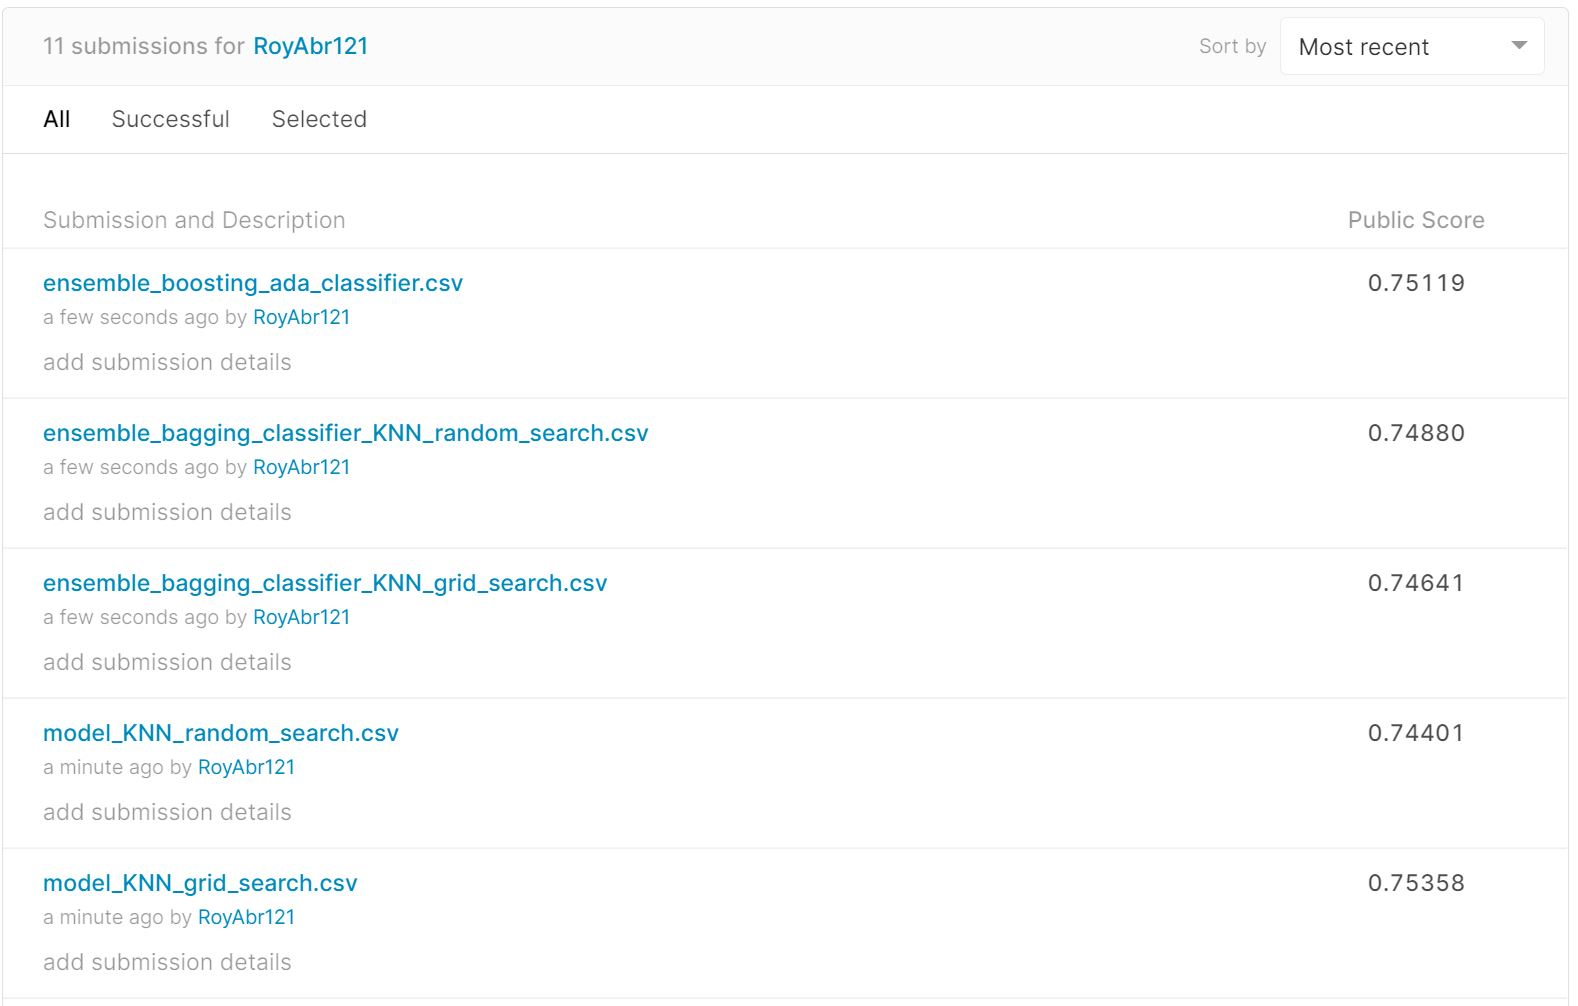

# Summary and Conclusions

some analysis and conclusions:

* The AdaBoostClassifier and KNN grid search model performed the best.

* AdaBoostClassifier beat the two other ensemble models, despite whaat the CV and F1 scores indicated - we can only rely on those up to a certain point.

* We have hit a ceiliing in terms of what can achieved using the features that we used. Using some models to complete the missing 'Ticket','Cabin' values and transforming them along with the 'Name' column can yield better results. This was not done due to the lack if time on my part to devote to this.

* I mainly choose the KNN model to be used versus NBC and LDA because I was more interested in it and wanted to apply it.

* It appears that the graid search KNN model was the most effective and the AdaBoostClassifier was second best, although this could be coincidental given the difference between them. Either way, KNN has proven it can compare and even outperform ensembles. 

* Despite my best efforts I could not beat the best scores from Excersize 1 - it appears that Linear Classification is better for this sort of data. If we had more data and observations we could explore this further.

My take is that these results can be improved given more time and effort (which I sadly could not afford). I would have also liked to apply the NBC and LDA models here, but could not - again due to the lack of time. 